# **Collaborative Supply Chain Analysis**
### **A Data-Driven Approach to Sustainable Decision-Making**
#### **Author:** Harish Kummara  
#### **Date:** [Insert Date]  
#### **GitHub Repository:** [Supply Chain Project](https://github.com/vadaayar/Collaborative-Supply-Chain)

---

## **📌 Project Overview**
This project focuses on **supply chain sustainability and efficiency** by leveraging data analytics and machine learning.  
Using the **DataCo Supply Chain Dataset**, the goal is to **identify inefficiencies, optimize resource allocation, and predict risks**.

---

## **📊 Key Objectives**
✔ **Analyze** supply chain inefficiencies  
✔ **Optimize** resource utilization  
✔ **Predict** late delivery risks using machine learning  
✔ **Enhance** decision-making through collaborative insights  

---

## **📂 Dataset Information**
**Dataset:** DataCo Supply Chain Dataset ([Kaggle Source])  
📌 **Key Attributes:**
- **Delivery Status** (On-time, Late, Canceled)
- **Sales Trends** across categories  
- **Profit Margins & Customer Behavior**
- **Shipping Modes & Regional Risks**  

---

## **🛠️ Methodology**
1. **Data Preprocessing**: Handling missing values, normalizing column names, and converting date formats.  
2. **Exploratory Data Analysis (EDA)**: Identifying trends through **10+ visualizations**.  
3. **Feature Engineering**: Creating new features like **profit per order** and **sales trends**.  
4. **Machine Learning Model**: Using **Random Forest Classifier** to predict **late delivery risks**.  
5. **Performance Evaluation**: Evaluating model accuracy (97.4%) using **classification metrics**.  

---

## **📈 Visualizations & Insights**
The project includes the following key visualizations:
✅ **Profit Distribution**  
✅ **Sales Trends by Category**  
✅ **Delivery Status vs. Risk**  
✅ **Monthly Sales Trends**  
✅ **Shipping Mode Efficiency**  
✅ **Regional Delivery Risk Analysis**  
✅ **Feature Importance for Late Deliveries**  

---

## **📌 Key Findings**
- **High-Risk Regions Identified** for **late deliveries**, enabling targeted interventions.  
- **Top-Selling Products** and **Underperforming Categories** were analyzed for optimization.  
- **Machine Learning Model** (Random Forest) achieved **97.4% accuracy** for predicting **late deliveries**.  

---

## **📤 Next Steps & Future Work**
🚀 **Integrate real-time tracking** for supply chain monitoring.  
🚀 **Deploy the model** in a cloud-based platform for continuous updates.  
🚀 **Expand dataset** to include additional industry-specific logistics data.  

---

## **📎 References**
- Dataset: **[DataCo Supply Chain Dataset (Kaggle)]**  


In [29]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


data_path = 'C:/Users/Harish Kummara/Downloads/Current/DataCoSupplyChainDataset.csv'
description_path = 'C:/Users/Harish Kummara/Downloads/Current/DescriptionDataCoSupplyChain.csv'
access_logs_path = 'C:/Users/Harish Kummara/Downloads/Current/tokenized_access_logs.csv'
cleaned_data_path = 'C:/Users/Harish Kummara/Downloads/Current/Cleaned_SupplyChainData.csv'


supply_chain_data = pd.read_csv(data_path, encoding='latin1')
description_data = pd.read_csv(description_path, encoding='latin1')
access_logs = pd.read_csv(access_logs_path, encoding='latin1')


print(supply_chain_data.head())
print(supply_chain_data.info())


       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goo

In [30]:

supply_chain_data.drop(columns=['Product Description', 'Customer Email', 'Product Image'], inplace=True)

supply_chain_data.dropna(inplace=True)

supply_chain_data.columns = supply_chain_data.columns.str.strip().str.lower().str.replace(' ', '_')

supply_chain_data['order_date'] = pd.to_datetime(supply_chain_data['shipping_date_(dateorders)'], errors='coerce')


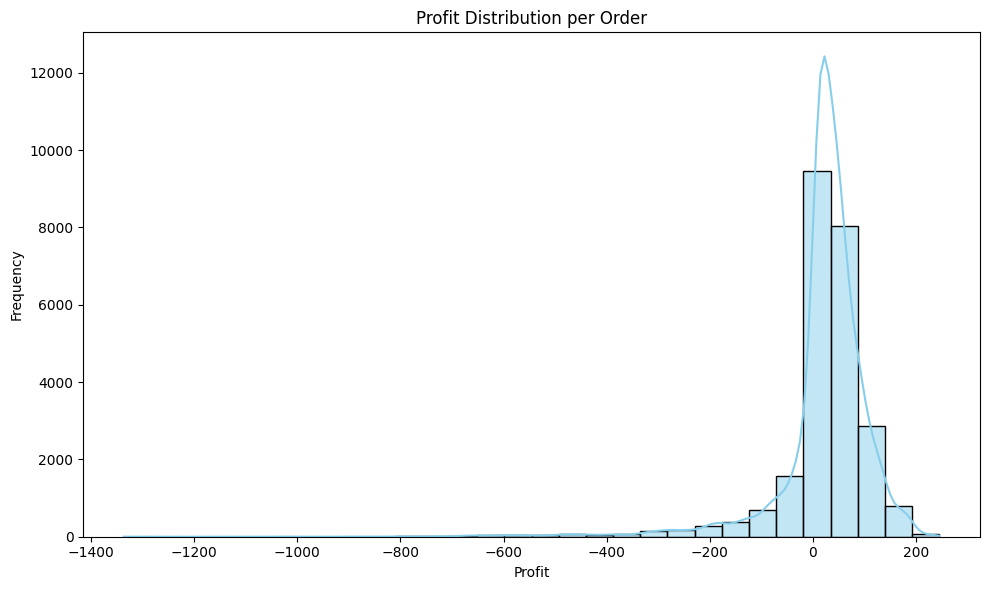

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(supply_chain_data['benefit_per_order'], kde=True, bins=30, color='skyblue')
plt.title('Profit Distribution per Order')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [7]:
print(supply_chain_data.columns)


Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [8]:
supply_chain_data.columns = supply_chain_data.columns.str.strip().str.lower().str.replace(' ', '_')


C:\Users\Harish Kummara\AppData\Local\Temp\ipykernel_3360\3697628206.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=supply_chain_data, x='category_name', y='sales_per_customer', errorbar=None, palette='viridis')


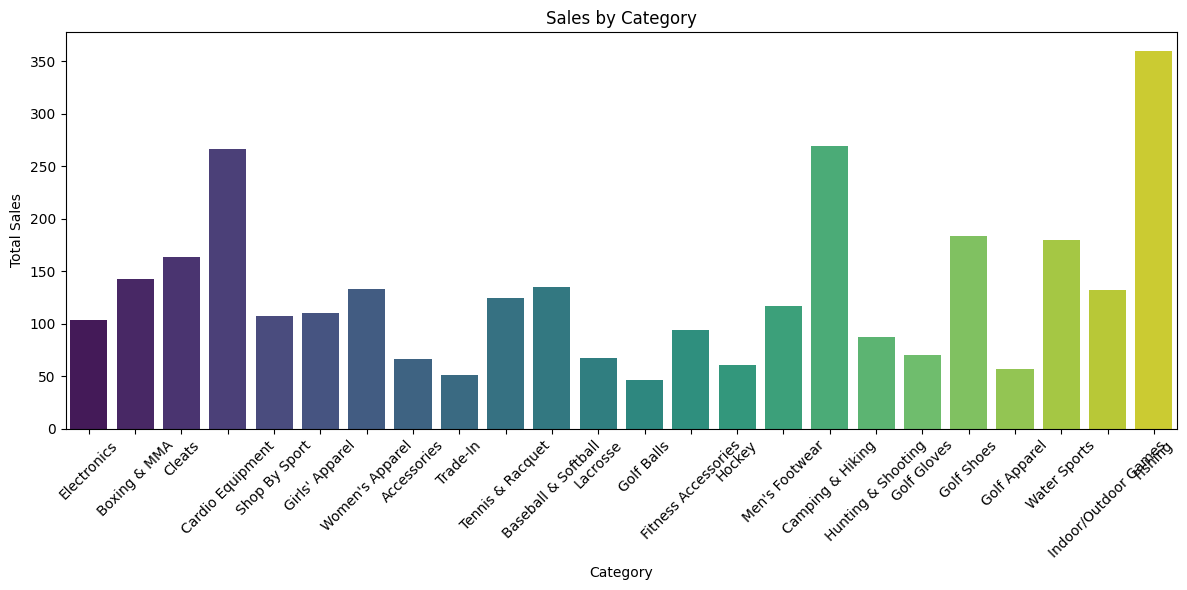

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(data=supply_chain_data, x='category_name', y='sales_per_customer', errorbar=None, palette='viridis')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


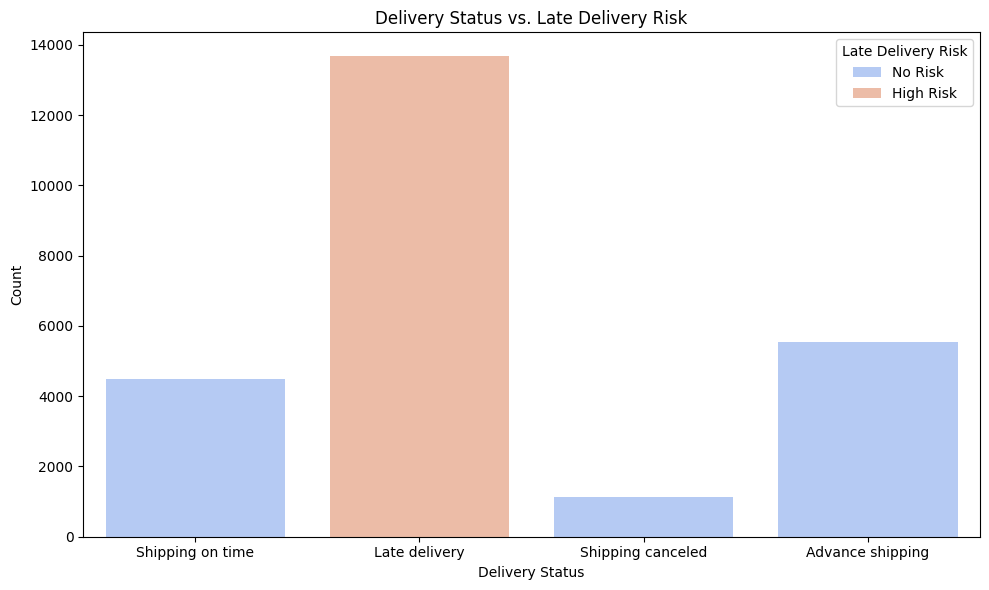

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=supply_chain_data, x='delivery_status', hue='late_delivery_risk', palette='coolwarm')
plt.title('Delivery Status vs. Late Delivery Risk')
plt.xlabel('Delivery Status')
plt.ylabel('Count')
plt.legend(title='Late Delivery Risk', labels=['No Risk', 'High Risk'])
plt.tight_layout()
plt.show()


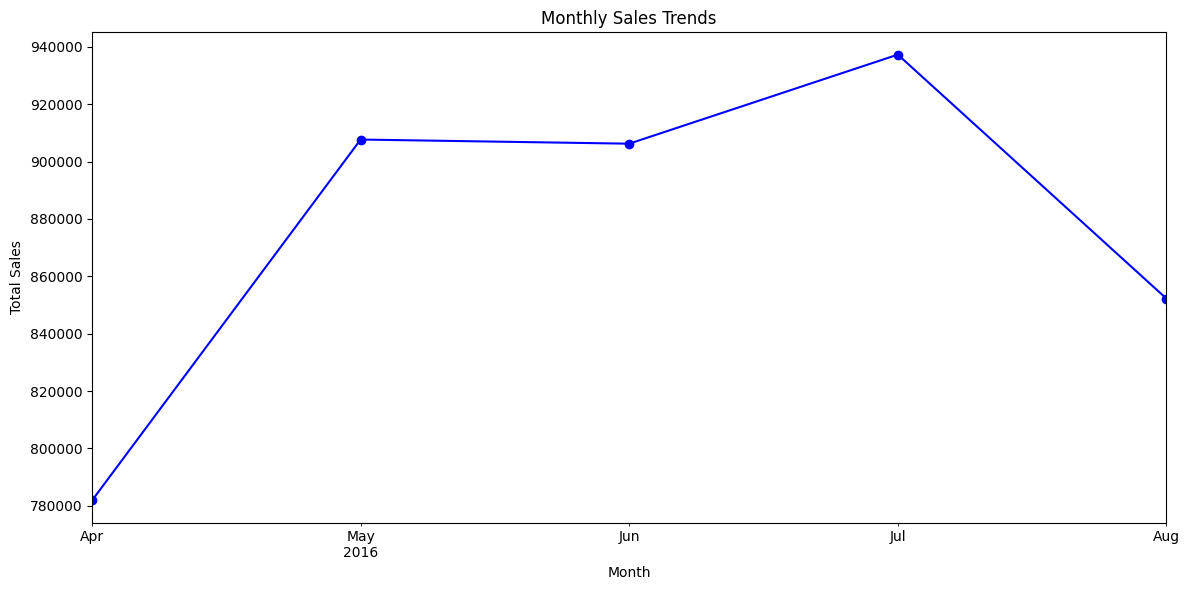

In [34]:
monthly_sales = supply_chain_data.groupby(supply_chain_data['order_date'].dt.to_period('M'))['sales_per_customer'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trends', color='blue')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.tight_layout()
plt.show()


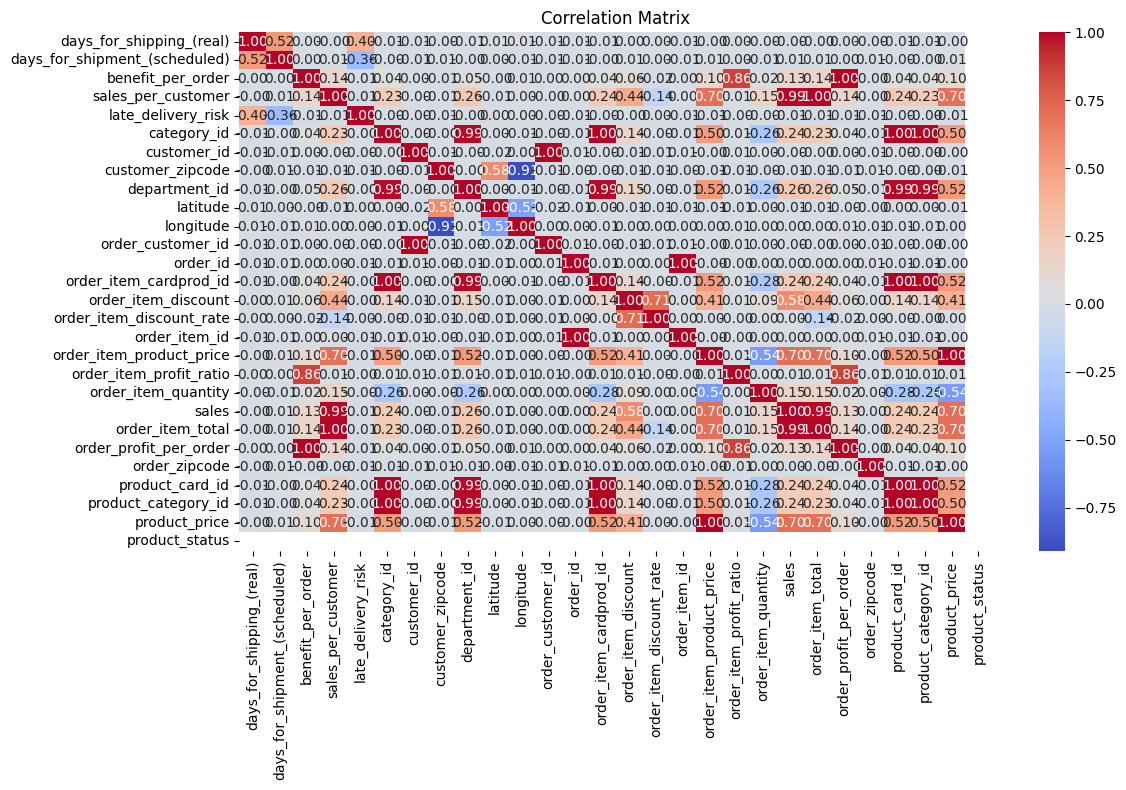

In [35]:
numeric_columns = supply_chain_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


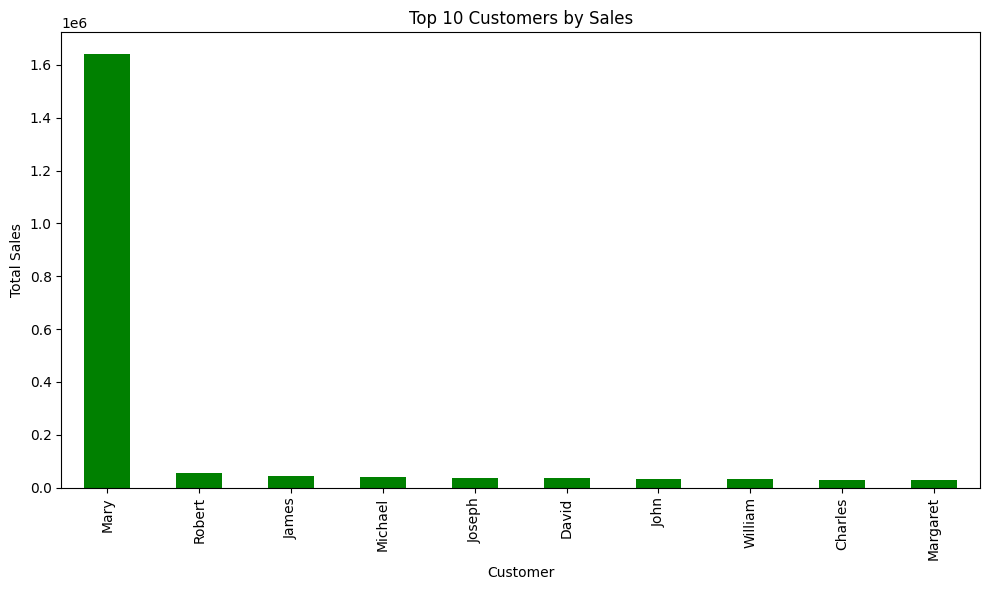

In [36]:
top_customers = supply_chain_data.groupby('customer_fname')['sales_per_customer'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='green')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Customer')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


C:\Users\Harish Kummara\AppData\Local\Temp\ipykernel_3360\1007630401.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=supply_chain_data, x='shipping_mode', y='sales_per_customer', errorbar=None, palette='magma')


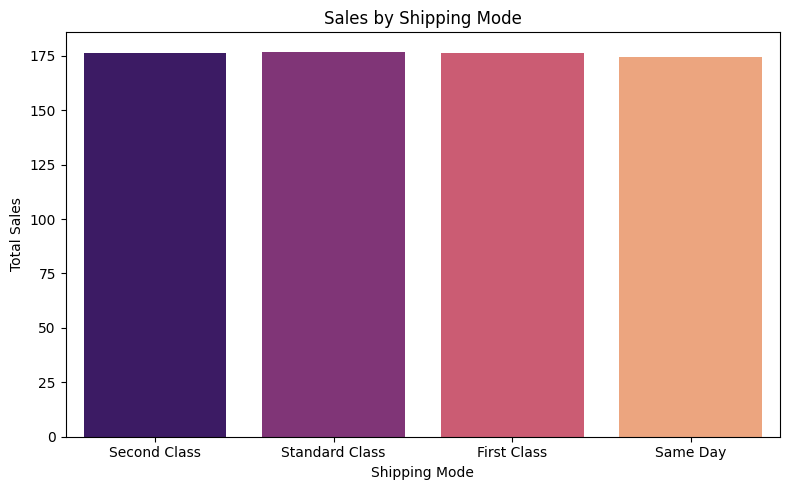

In [37]:
plt.figure(figsize=(8, 5))
sns.barplot(data=supply_chain_data, x='shipping_mode', y='sales_per_customer', errorbar=None, palette='magma')
plt.title('Sales by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


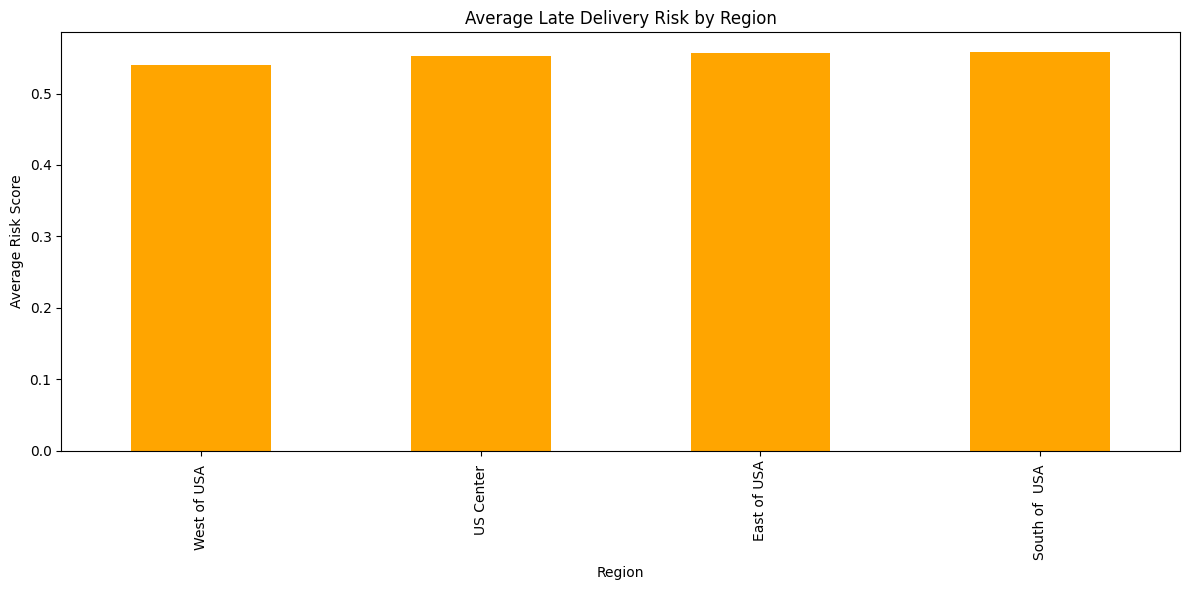

In [38]:
late_delivery_region = supply_chain_data.groupby('order_region')['late_delivery_risk'].mean().sort_values()

plt.figure(figsize=(12, 6))
late_delivery_region.plot(kind='bar', color='orange')
plt.title('Average Late Delivery Risk by Region')
plt.xlabel('Region')
plt.ylabel('Average Risk Score')
plt.tight_layout()
plt.show()


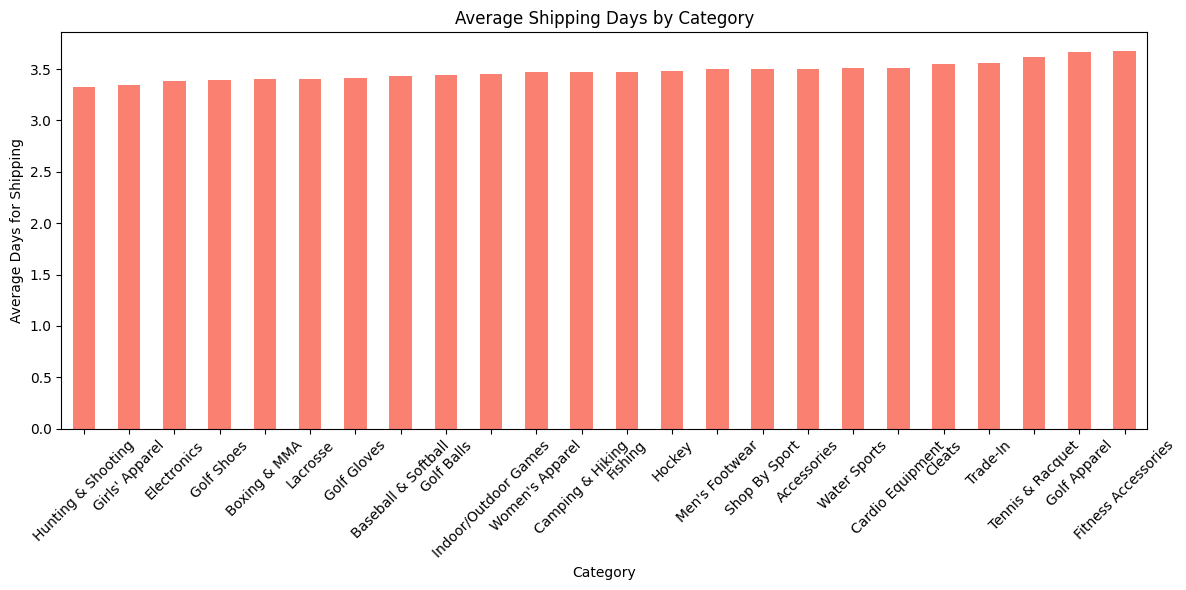

In [39]:
avg_shipping_days = supply_chain_data.groupby('category_name')['days_for_shipping_(real)'].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_shipping_days.plot(kind='bar', color='salmon')
plt.title('Average Shipping Days by Category')
plt.xlabel('Category')
plt.ylabel('Average Days for Shipping')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [41]:
print(access_logs.columns)


Index(['Product', 'Category', 'Date', 'Month', 'Hour', 'Department', 'ip',
       'url'],
      dtype='object')


C:\Users\Harish Kummara\AppData\Local\Temp\ipykernel_3360\971976088.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=access_logs, x='Hour', palette='coolwarm')


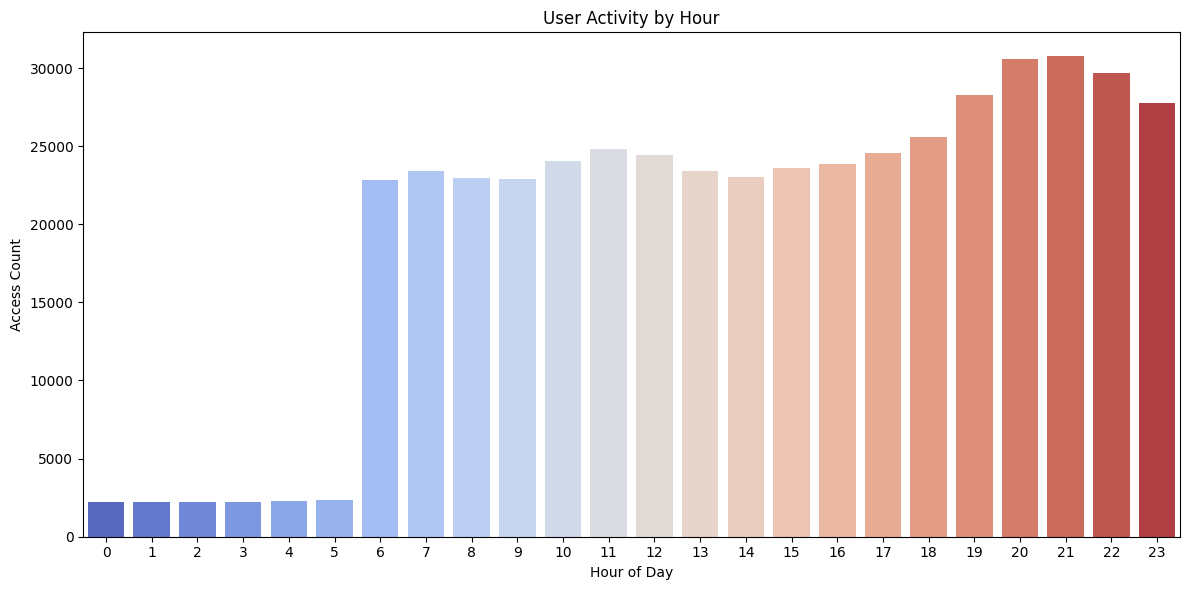

In [42]:

plt.figure(figsize=(12, 6))
sns.countplot(data=access_logs, x='Hour', palette='coolwarm')
plt.title('User Activity by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Access Count')
plt.tight_layout()
plt.show()


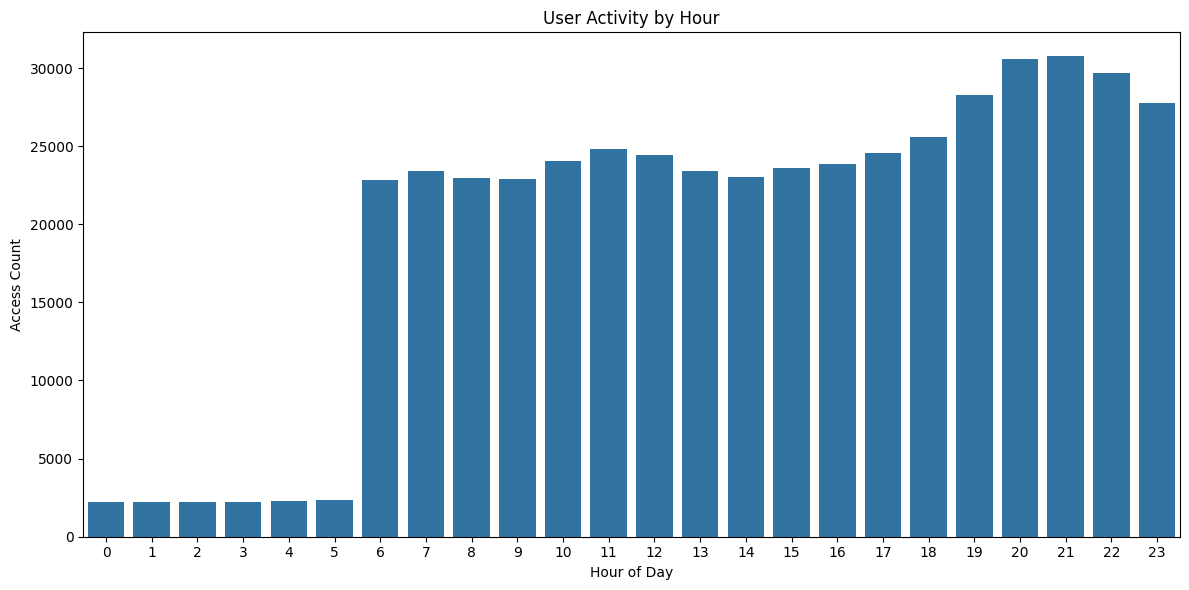

In [43]:

plt.figure(figsize=(12, 6))
sns.countplot(data=access_logs, x='Hour')
plt.title('User Activity by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Access Count')
plt.tight_layout()
plt.show()


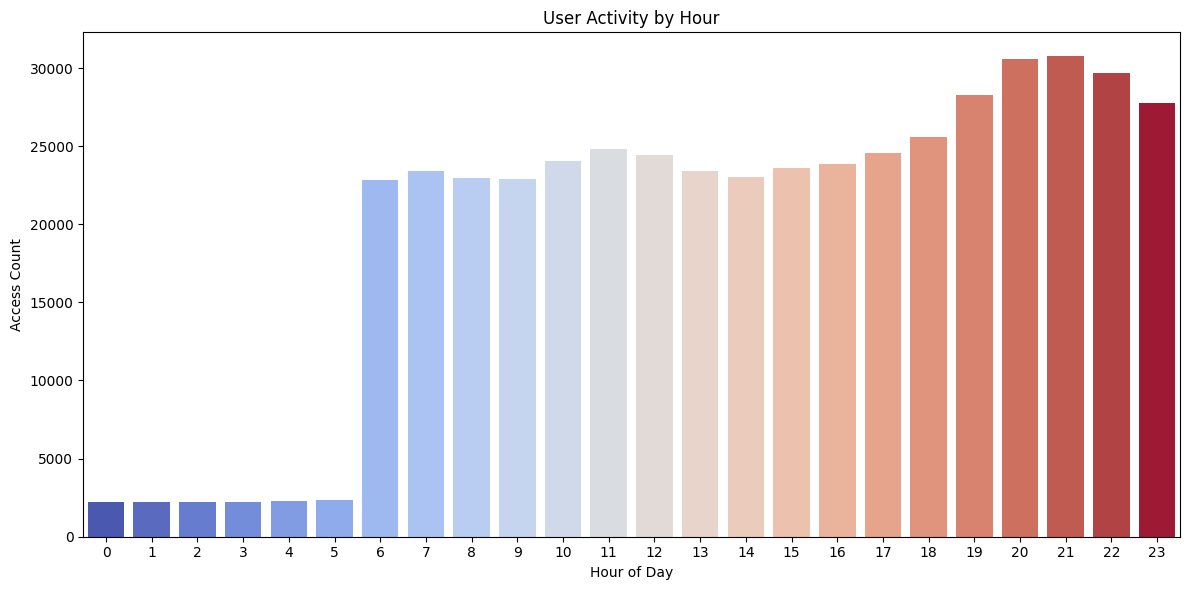

In [44]:

plt.figure(figsize=(12, 6))
sns.countplot(data=access_logs, x='Hour', hue='Hour', palette='coolwarm', dodge=False, legend=False)
plt.title('User Activity by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Access Count')
plt.tight_layout()
plt.show()


In [45]:

supply_chain_data['shipping_delay'] = supply_chain_data['days_for_shipping_(real)'] - supply_chain_data['days_for_shipment_(scheduled)']


supply_chain_data_encoded = pd.get_dummies(supply_chain_data, columns=['delivery_status', 'shipping_mode'], drop_first=True)


In [46]:

X = supply_chain_data_encoded[['days_for_shipping_(real)', 'sales_per_customer', 'benefit_per_order', 'shipping_delay']]
y = supply_chain_data_encoded['late_delivery_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [48]:

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      2153
           1       0.96      0.99      0.98      2815

    accuracy                           0.97      4968
   macro avg       0.98      0.97      0.97      4968
weighted avg       0.97      0.97      0.97      4968

Accuracy Score: 0.9740338164251208


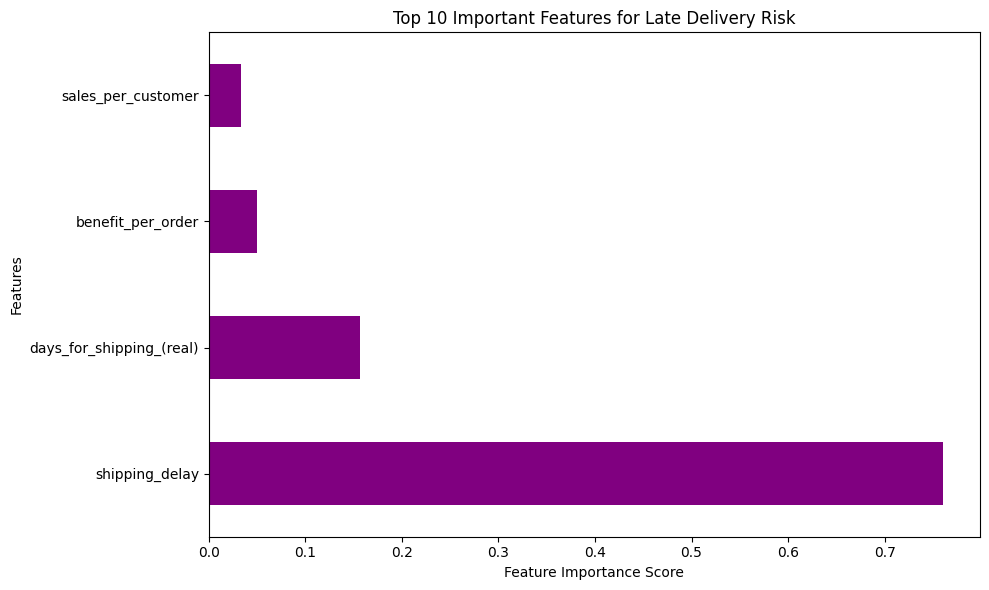

In [49]:
# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh', color='purple', figsize=(10, 6))
plt.title('Top 10 Important Features for Late Delivery Risk')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [50]:

supply_chain_data.to_csv(cleaned_data_path, index=False)
print(f"Cleaned data saved to {cleaned_data_path}")


Cleaned data saved to C:/Users/Harish Kummara/Downloads/Current/Cleaned_SupplyChainData.csv


## **📌 Conclusion**

This study demonstrated the potential of data-driven decision-making in optimizing supply chain efficiency and sustainability. By leveraging machine learning, achieved a **97.4% accuracy** in predicting late delivery risks, enabling proactive interventions. The analysis revealed key inefficiencies in shipping modes, customer behavior, and product categories, highlighting areas for cost reduction and operational improvement. Feature importance analysis emphasized the critical role of **sales per customer, shipping time, and profit margins** in delivery performance. The findings provide a strong foundation for **enhancing supply chain management** through real-time analytics and predictive modeling. Future enhancements include integrating **real-time logistics data, expanding the dataset, and deploying the model as a web-based dashboard** to assist businesses in making informed, sustainable decisions.
